# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
import re

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt

# Testing

In [ ]:
df = pd.read_csv("../Dataset/2_Korea_Bakery_Price.csv")

In [ ]:
df

,Name,price
0,angbutter,4800
1,plain bread,3500
2,jam,1500
3,ice coffe,4000
4,croissant,3500
5,ice coffe latter,4500
6,tiramisu croissant,4800
7,cacao deep,4000
8,pain au chocolat,3500
9,almond croissant,4000


# Load Data

In [6]:
listDataPretrainedModel = []

In [7]:
def readDataSet(path):
    try:
        df = pd.read_excel(path)
    except Exception:
        df = pd.read_csv(path)
    return df

def addDataPretrainedModel(path):
    listDataPretrainedModel.append(readDataSet(path))

In [8]:
onlyfiles = [f for f in listdir("../Dataset") if isfile(join("../Dataset", f))]

In [9]:
onlyfiles

['1 Coffe_Sales.csv',
 '10 Europe_Bike_Store_Sales.csv',
 '11 E-commerce_Business_Transaction.csv',
 '12 Liquor_Sales.csv',
 '2 Coffee_Bean_Sales.csv',
 '3 Balaji_Fast_Food_Sales.csv',
 '4 Pizza_Sales.csv',
 '5 Coffee_Shop_Sales.xlsx',
 '6 French_Bakery_Daily_Sales.csv',
 '7 Mexico_Toy_Sales.csv',
 '8 Online_Retail_Sales.csv',
 '9 Electronic_Sales.csv']

In [10]:
for file in onlyfiles:
    pathFile = join('../Dataset/', file)
    addDataPretrainedModel(path=pathFile)

In [11]:
listDataPretrainedModel[1]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


# Preprocessing

## Based

In [12]:
import copy

listTest = copy.deepcopy(listDataPretrainedModel)

In [13]:
def clean_column_names(df):
    def clean_name(name):
        name = name.lower()
        name = re.sub(r'[^\w]', '', name)
        name = name.replace(' ', '')
        name = name.replace('_', '')
        return name
    
    df.columns = [clean_name(col) for col in df.columns]
    df = df.loc[:, ~df.columns.str.contains('cust')]

    return df

## Date

In [14]:
def standardize_date_columns(df):    
    date_columns = [col for col in df.columns if 'date' in col]
    
    if not date_columns:
        raise ValueError("Dataset tidak memiliki kolom yang mengandung kata 'date'.")

    standardized_dates = []

    for col in date_columns:
        df[col] = df[col].astype(str) 
        if (df[col].str.contains('/').any() and df[col].str.contains('-').any()):
            df[col] = df[col].str.replace('-', '/')
        try:
            df[col] = pd.to_datetime(df[col]) 
        except Exception:
            try:
                df[col] = pd.to_datetime(df[col], format="%d/%m/%Y")
            except Exception:
                try:
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                except Exception:
                    continue
        
        standardized_dates.append(df[col])
        
        # endfor

    df.drop(columns=date_columns, inplace=True)
    
    df['TEMP DATE'] = pd.concat(standardized_dates, axis=1).bfill(axis=1).iloc[:, 0]
    
    df = df.sort_values('TEMP DATE').reset_index(drop=True)
    return df



## Product

In [15]:
def standardize_product_columns(df):
    prioritize_name = ['sku', 'description', 'name', 'detail', 'product', 'article', 'menu']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    delete_col = []
    
    if len(found_columns) > 1:
        for i in range(len(found_columns)):
            if 'category' in found_columns[i]:
                delete_col.append(i)
                
    for i in range(len(delete_col)):
        found_columns.pop(delete_col[i])
    
    
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP PRODUCT'})
    
    found_columns = []
    return df

## Quantity

In [16]:
def standardize_quantity_columns(df):
    prioritize_name = ['quantity', 'qty', 'units']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    if len(found_columns) == 0:
        df['TEMP QUANTITY'] = 1
        df['TEMP QUANTITY'] = df['TEMP QUANTITY'].astype(float)

        return df
    
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP QUANTITY'})
    df['TEMP QUANTITY'] = df['TEMP QUANTITY'].astype(float)
    
    df = df[df['TEMP QUANTITY'] > 0]

    
    found_columns = []
    return df

## Price

In [17]:
def standardize_price_columns(df):
    prioritize_name = ['money', 'price']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    delete_col = []
    
    if len(found_columns) > 1:
        for i in range(len(found_columns)):
            if 'total' in found_columns[i]:
                delete_col.append(i)
    
                    
    for i in range(len(delete_col)):
            found_columns.pop(delete_col[i])
                
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP PRICE'})
    
    df['TEMP PRICE'] = df['TEMP PRICE'].astype(str)

    
    df['TEMP PRICE'] = df['TEMP PRICE'].str.replace(',', '.', regex=False)
    
    df['TEMP PRICE'] = df['TEMP PRICE'].str.replace(r'[^0-9.]', '', regex=True)
    
    df['TEMP PRICE'] = df['TEMP PRICE'].astype(float)
    
    df = df[df['TEMP PRICE'] > 0]
    
    found_columns = []
    return df

## Filtering Column

In [18]:
def remove_non_temp_columns(df):
    temp_columns = [col for col in df.columns if 'TEMP' in col]
    
    df = df[temp_columns]
    
    return df

In [19]:
def clean_and_standardize_data(df):
    df = clean_column_names(df)
    df = standardize_date_columns(df)
    df = standardize_product_columns(df)    
    df = standardize_quantity_columns(df)
    df = standardize_price_columns(df)
    df = remove_non_temp_columns(df)
    return df

In [20]:
listTest = [clean_and_standardize_data(df) for df in listTest]

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1429725957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1429725957.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1429725957.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

# Extract Data

In [21]:
listTestExtract = copy.deepcopy(listTest)

In [22]:
def process_aggregated_data(df):
    required_columns = ['TEMP DATE', 'TEMP PRODUCT', 'TEMP PRICE', 'TEMP QUANTITY']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame harus memiliki kolom {required_columns}")
    
    
    df['Year'] = pd.to_datetime(df['TEMP DATE']).dt.year
    df['Month'] = pd.to_datetime(df['TEMP DATE']).dt.month
    df['Day'] = pd.to_datetime(df['TEMP DATE']).dt.day
    df['Is_Weekend'] = pd.to_datetime(df['TEMP DATE']).dt.weekday >= 5  

    grouped = df.groupby('TEMP DATE')

    # Hitung kolom tambahan
    aggregated_data = grouped.agg(
        Total_Transactions=('TEMP DATE', 'size'),
        Total_Products=('TEMP PRODUCT', 'nunique'),
        # Mean_Price_Per_Product=('TEMP PRICE', 'mean'),
        Highest_Price=('TEMP PRICE', 'max'),
        Lowest_Price=('TEMP PRICE', 'min'),
        Total_Quantity=('TEMP QUANTITY', 'sum'),
        Mean_Quantity_Per_Transaction=('TEMP QUANTITY', 'mean'),
        Highest_Quantity_Product=('TEMP QUANTITY', 'max'),
        Lowest_Quantity_Product=('TEMP QUANTITY', 'min'),
        Profit_Per_Day=('TEMP PRICE', lambda x: (x * df.loc[x.index, 'TEMP QUANTITY']).sum())
    ).reset_index()
    
    def calculate_additional_features(group):
        temp_df = group.sort_values('TEMP PRICE')
        highest_price = temp_df['TEMP PRICE'].max()
        lowest_price = temp_df['TEMP PRICE'].min()
        
        # Urutkan berdasarkan harga dan quantity
        sorted_prices = temp_df['TEMP PRICE'].unique()
        sorted_quantities = temp_df.groupby('TEMP PRODUCT')['TEMP QUANTITY'].sum().sort_values()

        # Second highest/lowest price
        second_highest_price = sorted_prices[-2] if len(sorted_prices) > 1 else 0
        second_lowest_price = sorted_prices[1] if len(sorted_prices) > 1 else 0

        # Median price and quantity
        # Hitung jumlah elemen
        n = len(sorted_quantities)

        # Jika n genap, ambil elemen awal dari tengah
        if n > 0:
            median_quantity = sorted_quantities.iloc[(n - 1) // 2]
        else:
            median_quantity = 0  # Jika tidak ada data, beri nilai 0

        # Untuk median price:
        sorted_prices = temp_df.sort_values(by='TEMP PRICE')['TEMP PRICE']
        if len(sorted_prices) > 0:
            median_price = sorted_prices.iloc[(n - 1) // 2]
        else:
            median_price = 0

        # Total quantity per specific price group
        total_quantity_highest_price = temp_df[temp_df['TEMP PRICE'] == highest_price]['TEMP QUANTITY'].sum()
        total_quantity_lowest_price = temp_df[temp_df['TEMP PRICE'] == lowest_price]['TEMP QUANTITY'].sum()
        total_quantity_second_highest_price = temp_df[temp_df['TEMP PRICE'] == second_highest_price]['TEMP QUANTITY'].sum()
        total_quantity_second_lowest_price = temp_df[temp_df['TEMP PRICE'] == second_lowest_price]['TEMP QUANTITY'].sum()
        total_quantity_median_price = temp_df[temp_df['TEMP PRICE'] == median_price]['TEMP QUANTITY'].sum()

        # Price corresponding to specific quantities
        price_highest_quantity = temp_df.loc[temp_df['TEMP QUANTITY'].idxmax(), 'TEMP PRICE']
        price_lowest_quantity = temp_df.loc[temp_df['TEMP QUANTITY'].idxmin(), 'TEMP PRICE']
        second_highest_quantity = sorted_quantities.iloc[-2] if len(sorted_quantities) > 1 else 0
        second_lowest_quantity = sorted_quantities.iloc[1] if len(sorted_quantities) > 1 else 0
        price_second_highest_quantity = temp_df[temp_df['TEMP QUANTITY'] == second_highest_quantity]['TEMP PRICE'].iloc[0] if len(temp_df[temp_df['TEMP QUANTITY'] == second_highest_quantity]) > 0 else 0
        price_second_lowest_quantity = temp_df[temp_df['TEMP QUANTITY'] == second_lowest_quantity]['TEMP PRICE'].iloc[0] if len(temp_df[temp_df['TEMP QUANTITY'] == second_lowest_quantity]) > 0 else 0
        price_median_quantity = temp_df[temp_df['TEMP QUANTITY'] == median_quantity]['TEMP PRICE'].iloc[0] if len(temp_df[temp_df['TEMP QUANTITY'] == median_quantity]) > 0 else 0

        return pd.Series({
            'Second_Highest_Price': second_highest_price,
            'Second_Lowest_Price': second_lowest_price,
            'Median_Price': median_price,
            'Median_Quantity':median_quantity,
            'Total_Quantity_Highest_Price': total_quantity_highest_price,
            'Total_Quantity_Lowest_Price': total_quantity_lowest_price,
            'Total_Quantity_Second_Highest_Price': total_quantity_second_highest_price,
            'Total_Quantity_Second_Lowest_Price': total_quantity_second_lowest_price,
            'Total_Quantity_Median_Price': total_quantity_median_price,
            'Price_Highest_Quantity': price_highest_quantity,
            'Price_Lowest_Quantity': price_lowest_quantity,
            'Second_Highest_Quantity': second_highest_quantity,
            'Second_Lowest_Quantity': second_lowest_quantity,
            'Price_Second_Highest_Quantity': price_second_highest_quantity,
            'Price_Second_Lowest_Quantity': price_second_lowest_quantity,
            'Price_Median_Quantity': price_median_quantity
        })
    
    additional_features = grouped.apply(calculate_additional_features).reset_index()
    aggregated_data = pd.merge(aggregated_data, additional_features, on='TEMP DATE', how='left')


    
    product_avg_price = df.groupby(['TEMP DATE', 'TEMP PRODUCT'])['TEMP PRICE'].mean().reset_index()
    mean_price_per_product = product_avg_price.groupby('TEMP DATE')['TEMP PRICE'].mean().reset_index()
    mean_price_per_product.rename(columns={'TEMP PRICE': 'Mean_Price_Per_Product'}, inplace=True)


    # Tambahkan informasi tanggal ke hasil agregasi
    aggregated_data['Year'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.year
    aggregated_data['Month'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.month
    aggregated_data['Day'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.day
    aggregated_data['Is_Weekend'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.weekday >= 5
    
    
    aggregated_data = pd.merge(aggregated_data, mean_price_per_product, on='TEMP DATE', how='left')
    
    desired_column_order = [
        'TEMP DATE', 'Year', 'Month', 'Day', 'Is_Weekend',
        'Total_Products', 'Highest_Price', 'Lowest_Price', 
        'Mean_Price_Per_Product', 'Total_Quantity', 
        'Mean_Quantity_Per_Transaction', 'Highest_Quantity_Product', 
        'Lowest_Quantity_Product', 'Second_Highest_Price', 'Second_Lowest_Price', 'Second_Highest_Quantity', 'Second_Lowest_Quantity',
        'Median_Quantity', 'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price',
        'Total_Quantity_Second_Highest_Price', 'Total_Quantity_Second_Lowest_Price',
        'Total_Quantity_Median_Price', 'Price_Highest_Quantity', 'Price_Lowest_Quantity',
        'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity', 'Price_Median_Quantity',
        'Profit_Per_Day'
    ]
    aggregated_data = aggregated_data[desired_column_order]
    
    aggregated_data = aggregated_data.rename(columns={'TEMP DATE': 'Date'})

    return aggregated_data


In [23]:
def process_aggregated_data(df):
    required_columns = ['TEMP DATE', 'TEMP PRODUCT', 'TEMP PRICE', 'TEMP QUANTITY']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame harus memiliki kolom {required_columns}")

    # Tambahkan informasi tanggal
    df['TEMP DATE'] = pd.to_datetime(df['TEMP DATE'])
    df['Year'] = df['TEMP DATE'].dt.year
    df['Month'] = df['TEMP DATE'].dt.month
    df['Day'] = df['TEMP DATE'].dt.day
    df['Is_Weekend'] = df['TEMP DATE'].dt.weekday >= 5  

    # Agregasi awal berdasarkan tanggal
    grouped = df.groupby('TEMP DATE')
    aggregated_data = grouped.agg(
        Total_Transactions=('TEMP DATE', 'size'),
        Total_Products=('TEMP PRODUCT', 'nunique'),
        Highest_Price=('TEMP PRICE', 'max'),
        Lowest_Price=('TEMP PRICE', 'min'),
        Total_Quantity=('TEMP QUANTITY', 'sum'),
        Mean_Quantity_Per_Transaction=('TEMP QUANTITY', 'mean'),
        Highest_Quantity_Product=('TEMP QUANTITY', 'max'),
        Lowest_Quantity_Product=('TEMP QUANTITY', 'min'),
        Profit_Per_Day=('TEMP PRICE', lambda x: (x * df.loc[x.index, 'TEMP QUANTITY']).sum())
    ).reset_index()

    # Fungsi untuk menghitung fitur tambahan
    def calculate_additional_features(group):
        # Agregasi berdasarkan produk untuk setiap tanggal
        temp_df = group.groupby('TEMP PRODUCT').agg(
            total_quantity=('TEMP QUANTITY', 'sum'),
            mean_price=('TEMP PRICE', 'mean')
        ).reset_index()

        # Urutkan berdasarkan harga dan quantity
        sorted_prices = temp_df.sort_values('mean_price')['mean_price'].unique()
        sorted_quantities = temp_df.sort_values('total_quantity')['total_quantity']

        # Harga tertinggi dan terendah
        highest_price = sorted_prices[-1] if len(sorted_prices) > 0 else 0
        lowest_price = sorted_prices[0] if len(sorted_prices) > 0 else 0

        # Harga kedua tertinggi dan terendah
        second_highest_price = sorted_prices[-2] if len(sorted_prices) > 1 else 0
        second_lowest_price = sorted_prices[1] if len(sorted_prices) > 1 else 0

        # Median price
        median_price = sorted_prices[(len(sorted_prices) - 1) // 2] if len(sorted_prices) > 0 else 0

        # Total quantity berdasarkan harga
        total_quantity_highest_price = temp_df[temp_df['mean_price'] == highest_price]['total_quantity'].sum()
        total_quantity_lowest_price = temp_df[temp_df['mean_price'] == lowest_price]['total_quantity'].sum()
        total_quantity_second_highest_price = temp_df[temp_df['mean_price'] == second_highest_price]['total_quantity'].sum()
        total_quantity_second_lowest_price = temp_df[temp_df['mean_price'] == second_lowest_price]['total_quantity'].sum()
        total_quantity_median_price = temp_df[temp_df['mean_price'] == median_price]['total_quantity'].sum()

        # Quantity tertinggi, terendah, dan median
        highest_quantity = sorted_quantities.iloc[-1] if len(sorted_quantities) > 0 else 0
        lowest_quantity = sorted_quantities.iloc[0] if len(sorted_quantities) > 0 else 0
        second_highest_quantity = sorted_quantities.iloc[-2] if len(sorted_quantities) > 1 else 0
        second_lowest_quantity = sorted_quantities.iloc[1] if len(sorted_quantities) > 1 else 0
        median_quantity = sorted_quantities.iloc[(len(sorted_quantities) - 1) // 2] if len(sorted_quantities) > 0 else 0

        # Harga berdasarkan quantity
        price_highest_quantity = temp_df[temp_df['total_quantity'] == highest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == highest_quantity]) > 0 else 0
        price_lowest_quantity = temp_df[temp_df['total_quantity'] == lowest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == lowest_quantity]) > 0 else 0
        price_second_highest_quantity = temp_df[temp_df['total_quantity'] == second_highest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == second_highest_quantity]) > 0 else 0
        price_second_lowest_quantity = temp_df[temp_df['total_quantity'] == second_lowest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == second_lowest_quantity]) > 0 else 0
        price_median_quantity = temp_df[temp_df['total_quantity'] == median_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == median_quantity]) > 0 else 0

        return pd.Series({
            'Second_Highest_Price': second_highest_price,
            'Second_Lowest_Price': second_lowest_price,
            'Median_Price': median_price,
            'Median_Quantity': median_quantity,
            'Total_Quantity_Highest_Price': total_quantity_highest_price,
            'Total_Quantity_Lowest_Price': total_quantity_lowest_price,
            'Total_Quantity_Second_Highest_Price': total_quantity_second_highest_price,
            'Total_Quantity_Second_Lowest_Price': total_quantity_second_lowest_price,
            'Total_Quantity_Median_Price': total_quantity_median_price,
            'Price_Highest_Quantity': price_highest_quantity,
            'Price_Lowest_Quantity': price_lowest_quantity,
            'Second_Highest_Quantity': second_highest_quantity,
            'Second_Lowest_Quantity': second_lowest_quantity,
            'Price_Second_Highest_Quantity': price_second_highest_quantity,
            'Price_Second_Lowest_Quantity': price_second_lowest_quantity,
            'Price_Median_Quantity': price_median_quantity
        })

    # Terapkan fungsi tambahan pada grup tanggal
    additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).reset_index()
    aggregated_data = pd.merge(aggregated_data, additional_features, on='TEMP DATE', how='left')

    # Tambahkan informasi tanggal kembali ke hasil agregasi
    aggregated_data['Year'] = aggregated_data['TEMP DATE'].dt.year
    aggregated_data['Month'] = aggregated_data['TEMP DATE'].dt.month
    aggregated_data['Day'] = aggregated_data['TEMP DATE'].dt.day
    aggregated_data['Is_Weekend'] = aggregated_data['TEMP DATE'].dt.weekday >= 5

    # Urutkan kolom sesuai keinginan
    desired_column_order = [
        'TEMP DATE', 'Year', 'Month', 'Day', 'Is_Weekend',
        'Total_Transactions', 'Total_Products', 'Highest_Price', 'Lowest_Price',
        'Second_Highest_Price', 'Second_Lowest_Price', 'Median_Price',
        'Total_Quantity', 'Mean_Quantity_Per_Transaction', 
        'Highest_Quantity_Product', 'Lowest_Quantity_Product',
        'Second_Highest_Quantity', 'Second_Lowest_Quantity', 'Median_Quantity',
        'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price',
        'Total_Quantity_Second_Highest_Price', 'Total_Quantity_Second_Lowest_Price',
        'Total_Quantity_Median_Price', 'Price_Highest_Quantity', 'Price_Lowest_Quantity',
        'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity', 'Price_Median_Quantity',
        'Profit_Per_Day'
    ]
    aggregated_data = aggregated_data[desired_column_order]
    aggregated_data = aggregated_data.rename(columns={'TEMP DATE': 'Date'})

    return aggregated_data


In [24]:
listTestExtract = [process_aggregated_data(df) for df in listTestExtract]

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\470132808.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).reset_index()
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\470132808.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).rese

# Data Splitting

In [29]:
listTestSplitting = copy.deepcopy(listTestExtract)

In [30]:
train_data = []
test_data = []

for i, df in enumerate(listTestSplitting):  # Tambahkan indeks sebagai Dataset_ID
    split_index = int(0.8 * len(df))

    train, test = df.iloc[:split_index], df.iloc[split_index:]

    # Tambahkan kolom Dataset_ID
    train['Dataset_ID'] = i
    test['Dataset_ID'] = i

    # Pisahkan fitur dan target
    X_train = train.drop(columns=['Profit_Per_Day'])
    y_train = train['Profit_Per_Day']
    X_test = test.drop(columns=['Profit_Per_Day'])
    y_test = test['Profit_Per_Day']

    # Simpan hasil split ke dalam list
    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1955794030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Dataset_ID'] = i
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1955794030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Dataset_ID'] = i
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1955794030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [31]:
X_train_full = pd.concat([data[0] for data in train_data], axis=0).reset_index(drop=True)
y_train_full = pd.concat([data[1] for data in train_data], axis=0).reset_index(drop=True)
X_test_full = pd.concat([data[0] for data in test_data], axis=0).reset_index(drop=True)
y_test_full = pd.concat([data[1] for data in test_data], axis=0).reset_index(drop=True)

In [32]:
X_train_full.columns

Index(['Date', 'Year', 'Month', 'Day', 'Is_Weekend', 'Total_Transactions',
       'Total_Products', 'Highest_Price', 'Lowest_Price',
       'Second_Highest_Price', 'Second_Lowest_Price', 'Median_Price',
       'Total_Quantity', 'Mean_Quantity_Per_Transaction',
       'Highest_Quantity_Product', 'Lowest_Quantity_Product',
       'Second_Highest_Quantity', 'Second_Lowest_Quantity', 'Median_Quantity',
       'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price',
       'Total_Quantity_Second_Highest_Price',
       'Total_Quantity_Second_Lowest_Price', 'Total_Quantity_Median_Price',
       'Price_Highest_Quantity', 'Price_Lowest_Quantity',
       'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity',
       'Price_Median_Quantity', 'Dataset_ID'],
      dtype='object')

# Model

## Catboost

In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
cat_features = ['Year', 'Month', 'Day', 'Is_Weekend', 'Dataset_ID']

In [ ]:
eval_set = Pool(data=X_test_full, label=y_test_full, cat_features=cat_features)

model = CatBoostRegressor(
    iterations=10000,
    depth=16,
    learning_rate=0.03,   
    l2_leaf_reg=2,
    random_strength=0.5,
    # bagging_temperature=1.5,
    subsample=0.8,
    max_bin=300,
    cat_features=cat_features,
    loss_function='RMSE',
    eval_metric='RMSE',
    bootstrap_type='Bernoulli',  
    # random_seed=42
)

In [ ]:
model.fit(X_train_full, y_train_full, eval_set=eval_set, verbose=10)

0:	learn: 32886.8157723	test: 51057.0966440	best: 51057.0966440 (0)	total: 1.16s	remaining: 3h 14m 5s
10:	learn: 25175.9452639	test: 41530.1605303	best: 41530.1605303 (10)	total: 20.3s	remaining: 5h 7m 44s
20:	learn: 19521.3920882	test: 35107.7198306	best: 35107.7198306 (20)	total: 39.4s	remaining: 5h 11m 52s
30:	learn: 15283.3723785	test: 30229.4320067	best: 30229.4320067 (30)	total: 59.6s	remaining: 5h 19m 31s
40:	learn: 12142.7990477	test: 26849.6850932	best: 26849.6850932 (40)	total: 1m 21s	remaining: 5h 31m 46s
50:	learn: 9840.4895997	test: 24253.4581090	best: 24253.4581090 (50)	total: 1m 43s	remaining: 5h 35m 21s
60:	learn: 8194.2362068	test: 22765.3151104	best: 22765.3151104 (60)	total: 2m 3s	remaining: 5h 36m 2s
70:	learn: 7007.1492593	test: 21777.1324162	best: 21777.1324162 (70)	total: 2m 24s	remaining: 5h 37m 46s


KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test_full)
mae = abs(y_test_full - y_pred).mean()
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2397.21


In [ ]:
figsize=(16, 6)

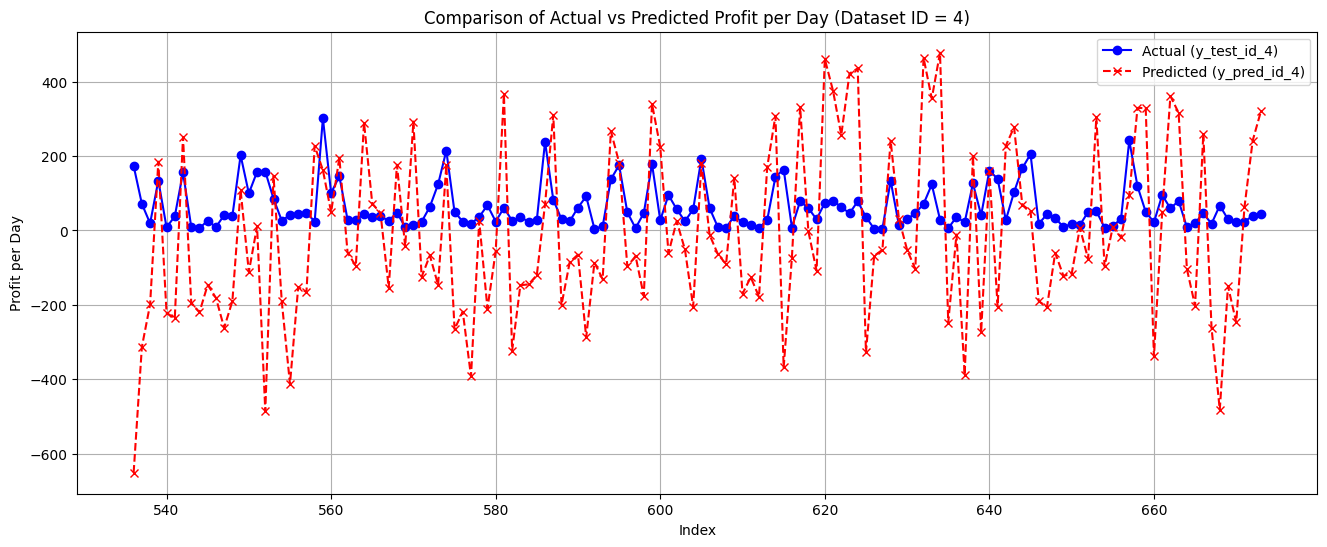

In [ ]:
X_test_id_4 = X_test_full[X_test_full['Dataset_ID'] == 4]
y_test_id_4 = y_test_full[X_test_full['Dataset_ID'] == 4]

y_pred_id_4 = model.predict(X_test_id_4)

plt.figure(figsize=figsize)
plt.plot(y_test_id_4.index, y_test_id_4, label='Actual (y_test_id_4)', color='blue', linestyle='-', marker='o')
plt.plot(y_test_id_4.index, y_pred_id_4, label='Predicted (y_pred_id_4)', color='red', linestyle='--', marker='x')

plt.title('Comparison of Actual vs Predicted Profit per Day (Dataset ID = 4)')
plt.xlabel('Index')
plt.ylabel('Profit per Day')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

In [33]:
import xgboost as XGBRegressor
from sklearn.metrics import mean_absolute_error

In [34]:
for df in [X_train_full, X_test_full]:
    df['Date'] = df['Date'].astype('int64') // 10**9

In [35]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=10000,
    learning_rate=0.01,
    max_depth=12,    
    subsample=0.3,
    colsample_bytree=0.9,
)

eval_set = [(X_train_full, y_train_full), (X_test_full, y_test_full)]
model.fit(
    X_train_full,
    y_train_full,
    eval_set=eval_set,
    # eval_metric="mae",
    # early_stopping_rounds=10,
    verbose=100
)


[0]	validation_0-rmse:33484.52733	validation_1-rmse:51691.53291
[100]	validation_0-rmse:14305.95788	validation_1-rmse:26907.47504
[200]	validation_0-rmse:7424.18054	validation_1-rmse:18110.96794
[300]	validation_0-rmse:4847.62841	validation_1-rmse:14618.31373
[400]	validation_0-rmse:3635.68923	validation_1-rmse:12499.66870
[500]	validation_0-rmse:2968.98901	validation_1-rmse:11406.50156
[600]	validation_0-rmse:2509.52944	validation_1-rmse:10646.70400
[700]	validation_0-rmse:2149.74957	validation_1-rmse:10128.01866
[800]	validation_0-rmse:1861.97069	validation_1-rmse:9709.05774
[900]	validation_0-rmse:1598.65804	validation_1-rmse:9399.74696
[1000]	validation_0-rmse:1426.25200	validation_1-rmse:9211.82348
[1100]	validation_0-rmse:1273.24853	validation_1-rmse:9041.20992
[1200]	validation_0-rmse:1112.68099	validation_1-rmse:8871.29431
[1300]	validation_0-rmse:988.86438	validation_1-rmse:8768.05536
[1400]	validation_0-rmse:859.51853	validation_1-rmse:8643.01284
[1500]	validation_0-rmse:775.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
figsize=(16, 6)

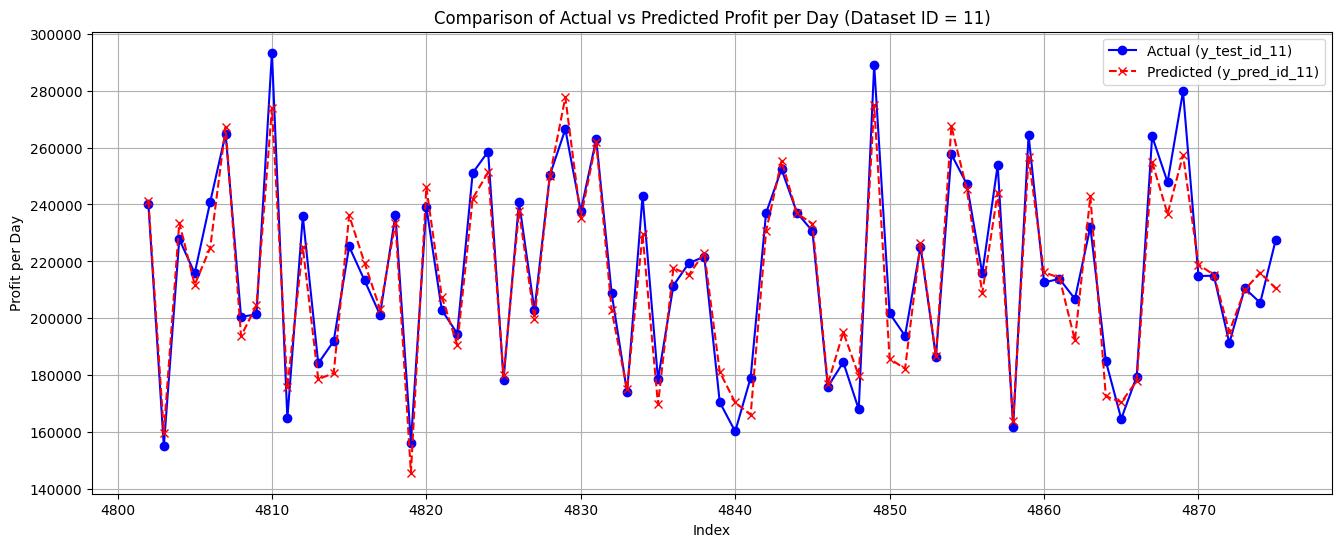

In [91]:
import matplotlib.pyplot as plt
id = 11

X_test_id = X_test_full[X_test_full['Dataset_ID'] == id]
y_test_id = y_test_full[X_test_full['Dataset_ID'] == id]
y_pred_id = model.predict(X_test_id)
plt.figure(figsize=figsize)
plt.plot(y_test_id.index, y_test_id, label=f'Actual (y_test_id_{id})', color='blue', linestyle='-', marker='o')
plt.plot(y_test_id.index, y_pred_id, label=f'Predicted (y_pred_id_{id})', color='red', linestyle='--', marker='x')
plt.title(f'Comparison of Actual vs Predicted Profit per Day (Dataset ID = {id})')
plt.xlabel('Index')
plt.ylabel('Profit per Day')
plt.legend()
plt.grid(True)
plt.show()


In [93]:
type(y_pred_id)

numpy.ndarray

## XGBoost For Single Column Prediction

In [38]:
def predictSingleColumnTierOne(df):
    col = df.columns
    
    for i in range(len(col)):
        if not ('Date' in col[i]):
            target_col = col[i]
    
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df['Is_Weekend'] = pd.to_datetime(df['Date']).dt.weekday >= 5
    df['Date'] = df['Date'].astype('int64') // 10**9
    
    split_index = int(0.8 * len(df))   
    
    train, test = df.iloc[:split_index], df.iloc[split_index:]
    
    X_train = train.drop(columns=[target_col])
    y_train = train[target_col]
    X_test = test.drop(columns=[target_col])
    y_test = test[target_col]
    
    
    modelSingleColumn = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.005,
        max_depth=12,
        subsample=0.8,
        colsample_bytree=0.9,
    )

    eval_set = [(X_train, y_train), (X_test, y_test)]
    modelSingleColumn.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        verbose=False
    )
    
    return modelSingleColumn

In [39]:
def predictSingleColumnTierTwo(df, target):
    
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df['Is_Weekend'] = pd.to_datetime(df['Date']).dt.weekday >= 5
    df['Date'] = df['Date'].astype('int64') // 10**9
    
    split_index = int(0.8 * len(df))   
    
    train, test = df.iloc[:split_index], df.iloc[split_index:]
    
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    
    modelSingleColumn = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.005,
        max_depth=12,
        subsample=0.8,
        colsample_bytree=0.9,
    )

    eval_set = [(X_train, y_train), (X_test, y_test)]
    modelSingleColumn.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        verbose=False
    )
    
    return modelSingleColumn

# Test for Another Dataset


In [116]:
df = readDataSet("test dataset.xlsx")

In [117]:
df = clean_and_standardize_data(df)

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1429725957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1429725957.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1429725957.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [118]:
df = process_aggregated_data(df)

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\470132808.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).reset_index()


In [119]:
main_column = ['Total_Transactions', 'Total_Products', 'Highest_Price', 'Median_Price', 'Lowest_Price', 'Total_Quantity', 'Highest_Quantity_Product', 'Lowest_Quantity_Product', 'Median_Quantity']

In [120]:
secondary_column = ['Second_Highest_Price', 'Second_Lowest_Price', 'Mean_Quantity_Per_Transaction', 'Second_Highest_Quantity', 'Second_Lowest_Quantity', 'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price', 'Total_Quantity_Second_Highest_Price', 'Total_Quantity_Second_Lowest_Price', 'Total_Quantity_Median_Price', 'Price_Highest_Quantity', 'Price_Lowest_Quantity', 'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity', 'Price_Median_Quantity']

In [ ]:
df1 = df[['Date', 'Total_Products']]

In [50]:
listModelTierOne = []
listModelTierTwo = []

In [51]:
for col in main_column:
    listModelTierOne.append(predictSingleColumnTierOne(df[['Date', col]]))

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1924945528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Date']).dt.year
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1924945528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Date']).dt.month
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1924945528.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [52]:
for col in secondary_column:
    all_col = [col for col in main_column]
    all_col.append('Date')
    all_col.append(col)
    listModelTierTwo.append(predictSingleColumnTierTwo(df[all_col], col))

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1453068736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Date']).dt.year
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1453068736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Date']).dt.month
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1453068736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## Create Forecast

In [123]:
def createForecast(df, numOfDay):
    if not np.issubdtype(df['Date'].dtype, np.datetime64):
        df['Date'] = pd.to_datetime(df['Date'])
        
    last_date = df['Date'].max()
    
    new_dates = [last_date + pd.Timedelta(days=i) for i in range(1, numOfDay + 1)]
    
    new_rows = pd.DataFrame({'Date': new_dates})
    
    # Ekstraksi atribut tanggal
    new_rows['Year'] = new_rows['Date'].dt.year
    new_rows['Month'] = new_rows['Date'].dt.month
    new_rows['Day'] = new_rows['Date'].dt.day
    new_rows['Is_Weekend'] = new_rows['Date'].dt.weekday >= 5
    
    # Tambahkan kolom lainnya dengan nilai NaN
    for col in df.columns:
        if col not in ['Date', 'Year', 'Month', 'Day', 'Is_Weekend']:
            new_rows[col] = np.nan
    
    df_extended = pd.concat([df, new_rows], ignore_index=True)
    
    for col in main_column:
        df_pred = df[['Date', col]].copy()
        model = predictSingleColumnTierOne(df_pred)
        df_temp = df_extended.tail(numOfDay).copy()
        df_final = df_temp[['Date', 'Year', 'Month', 'Day', 'Is_Weekend', col]].copy()
        
        X = df_final.drop(columns=[col]).copy()
        X['Date'] = X['Date'].astype('int64') // 10**9
        y = df_final[col]
        
        y_pred = model.predict(X)
        df_extended[col].iloc[-numOfDay:] = y_pred
        
    
    for col in secondary_column:
        all_col = [col for col in main_column]
        all_col.append('Date')
        all_col.append(col)
        
        df_pred = df[all_col].copy()
        model = predictSingleColumnTierTwo(df_pred, col)
        df_temp = df_extended.tail(numOfDay).copy()
        all_col.append('Year')
        all_col.append('Month')
        all_col.append('Day')
        all_col.append('Is_Weekend')
        df_final = df_temp[all_col].copy()
        
        X = df_final.drop(columns=[col]).copy()
        X['Date'] = X['Date'].astype('int64') // 10**9
        y = df_final[col]
        
        y_pred = model.predict(X)
        df_extended[col].iloc[-numOfDay:] = y_pred
        
    # Gabungkan DataFrame asli dengan baris baru
    
    
    return df_extended


In [125]:
df

,Date,Year,Month,Day,Is_Weekend,Total_Transactions,Total_Products,Highest_Price,Lowest_Price,Second_Highest_Price,...,Total_Quantity_Lowest_Price,Total_Quantity_Second_Highest_Price,Total_Quantity_Second_Lowest_Price,Total_Quantity_Median_Price,Price_Highest_Quantity,Price_Lowest_Quantity,Price_Second_Highest_Quantity,Price_Second_Lowest_Quantity,Price_Median_Quantity,Profit_Per_Day
0,2024-01-01,2024,1,1,False,26,9,12.0,4.5,11.5,...,4.0,11.0,9.0,11.0,11.5,10.0,11.5,4.5,5.0,577.0
1,2024-01-02,2024,1,2,False,33,10,13.0,4.5,12.0,...,13.0,19.0,13.0,12.0,12.0,13.0,8.0,6.5,5.5,731.0
2,2024-01-03,2024,1,3,False,35,10,13.0,4.5,12.0,...,2.0,14.0,11.0,9.0,8.0,4.5,12.0,6.5,5.0,918.0
3,2024-01-04,2024,1,4,False,21,9,13.0,4.5,12.0,...,3.0,9.0,6.0,6.0,13.0,4.5,13.0,6.5,5.5,611.0
4,2024-01-05,2024,1,5,False,21,9,13.0,4.5,12.0,...,7.0,12.0,3.0,7.0,13.0,11.5,12.0,5.5,8.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2024-12-26,2024,12,26,False,21,9,13.0,4.5,12.0,...,10.0,5.0,9.0,8.0,13.0,7.0,13.0,11.5,10.0,496.0
361,2024-12-27,2024,12,27,False,25,9,13.0,4.5,12.0,...,14.0,13.0,9.0,12.0,4.5,6.5,12.0,13.0,5.0,617.5
362,2024-12-28,2024,12,28,True,33,10,13.0,4.5,12.0,...,4.0,15.0,11.0,17.0,10.0,4.5,7.0,6.5,5.0,1088.5
363,2024-12-29,2024,12,29,True,25,10,13.0,4.5,12.0,...,6.0,11.0,2.0,2.0,10.0,5.0,10.0,5.0,5.5,670.0


In [126]:
dftestt = createForecast(df, 30)

C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1113702725.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_extended[col].iloc[-numOfDay:] = y_pred
C:\Users\ipung\AppData\Local\Temp\ipykernel_18916\1113702725.py:35: SettingWithCopyW

In [128]:
dftestt.tail(31)

,Date,Year,Month,Day,Is_Weekend,Total_Transactions,Total_Products,Highest_Price,Lowest_Price,Second_Highest_Price,...,Total_Quantity_Lowest_Price,Total_Quantity_Second_Highest_Price,Total_Quantity_Second_Lowest_Price,Total_Quantity_Median_Price,Price_Highest_Quantity,Price_Lowest_Quantity,Price_Second_Highest_Quantity,Price_Second_Lowest_Quantity,Price_Median_Quantity,Profit_Per_Day
364,2024-12-30,2024,12,30,False,28.000000,10.000000,13.000000,4.500000,12.000000,...,9.000000,6.000000,8.000000,15.000000,10.000000,5.500000,10.000000,13.000000,11.500000,639.0
365,2024-12-31,2024,12,31,False,32.406166,9.771445,12.996977,4.549812,11.555146,...,9.967875,13.848620,11.142941,14.793161,10.074501,7.112768,9.544521,5.928726,7.118624,NaN
366,2025-01-01,2025,1,1,False,23.168627,9.074339,12.797371,4.696837,11.410346,...,7.742606,8.085494,6.381357,8.099705,7.726546,7.599057,11.144870,7.982567,7.420883,NaN
367,2025-01-02,2025,1,2,False,25.410036,9.348402,13.021461,4.700372,11.945728,...,8.872894,9.696177,5.923049,10.044644,8.713816,7.199872,10.288618,7.491340,7.487411,NaN
368,2025-01-03,2025,1,3,False,26.456341,9.490168,12.984205,4.700380,11.529491,...,9.054083,10.370126,7.818836,10.535089,8.955999,6.997878,10.166765,7.898998,9.111678,NaN
369,2025-01-04,2025,1,4,True,23.901678,9.133418,12.999762,4.675743,11.542661,...,8.326521,7.424756,7.944528,6.932168,7.870729,6.922764,9.586544,8.030337,8.468980,NaN
370,2025-01-05,2025,1,5,True,24.235758,9.021057,12.998731,4.679041,11.531469,...,8.247384,10.213986,6.940000,8.067643,8.029055,6.656370,9.967085,6.851482,8.212519,NaN
371,2025-01-06,2025,1,6,False,23.565008,9.297359,12.926821,4.704718,11.567487,...,8.513966,6.394882,8.028057,7.225360,8.492891,7.732924,9.999617,7.815722,8.207230,NaN
372,2025-01-07,2025,1,7,False,23.297331,9.295978,12.995112,4.712944,11.568524,...,7.168296,5.432117,8.242059,6.617106,8.563085,8.164392,10.733240,7.738408,7.427746,NaN
373,2025-01-08,2025,1,8,False,23.299904,9.307374,12.997381,4.703371,11.566020,...,6.977756,5.851258,7.459243,7.804940,8.462122,7.650690,10.043510,7.346721,8.156400,NaN


In [88]:
dfdf = dftestt.tail(5).copy()

In [90]:
dfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 390 to 394
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 5 non-null      datetime64[ns]
 1   Year                                 5 non-null      int32         
 2   Month                                5 non-null      int32         
 3   Day                                  5 non-null      int32         
 4   Is_Weekend                           5 non-null      bool          
 5   Total_Transactions                   0 non-null      float64       
 6   Total_Products                       0 non-null      float64       
 7   Highest_Price                        0 non-null      float64       
 8   Lowest_Price                         0 non-null      float64       
 9   Second_Highest_Price                 0 non-null      float64       
 10  Second_Lowest_